In [ ]:
# Loading the Reuters dataset.
from keras.datasets import reuters

In [ ]:
# As with the IMDB dataset, the argument num_words=10000 restricts the data to the
# 10,000 most frequently occurring words found in the data.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words= 10000)

In [ ]:
train_data.shape

(8982,)

In [ ]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
test_data.shape

(2246,)

In [ ]:
train_data[:1]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
      dtype=object)

In [ ]:
# Decoding newswires back to text.
word_index = reuters.get_word_index()
reverse_word_index = dict((value, key) for (key, value) in word_index.items())
decoded_newswire = ' '.join([reverse_word_index.get(i-3,"?") for i in train_data[0]])

In [ ]:
decoded_newswire_labels = ' '.join([reverse_word_index.get(i-3,"?") for i in train_labels[0]])

TypeError: 'numpy.int64' object is not iterable

In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
# Encoding the input data.
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1
  return results
x_train =  vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# Encoding the labels.
def to_one_hot(labels, dimension = 46):
  results  = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
# Model definition.
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64,activation = "relu"),
    layers.Dense(64,activation = "relu"),
    layers.Dense(46,activation = "softmax")
])

In [ ]:
# Compiling the model.
model.compile(optimizer= "rmsprop",
              loss= 'categorical_crossentropy',
              metrics= ["accuracy"])


In [ ]:
# Setting aside a validation set.
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
# Training the model.
history = model.fit(partial_x_train, partial_y_train, epochs= 20, batch_size= 512, validation_data= (x_val,y_val))


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.3556 - loss: 3.2715 - val_accuracy: 0.6270 - val_loss: 1.8166
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.6665 - loss: 1.6174 - val_accuracy: 0.6960 - val_loss: 1.3779
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.7447 - loss: 1.1722 - val_accuracy: 0.7330 - val_loss: 1.1948
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.7890 - loss: 0.9474 - val_accuracy: 0.7560 - val_loss: 1.1034
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8249 - loss: 0.7930 - val_accuracy: 0.7660 - val_loss: 1.0218
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.8597 - loss: 0.6602 - val_accuracy: 0.7800 - val_loss: 0.9918
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8872 - loss: 0.5370 - val_accuracy: 0.7790 - val_loss: 1.0104
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9069 - loss: 0.4623 - val_accuracy: 0.8190 

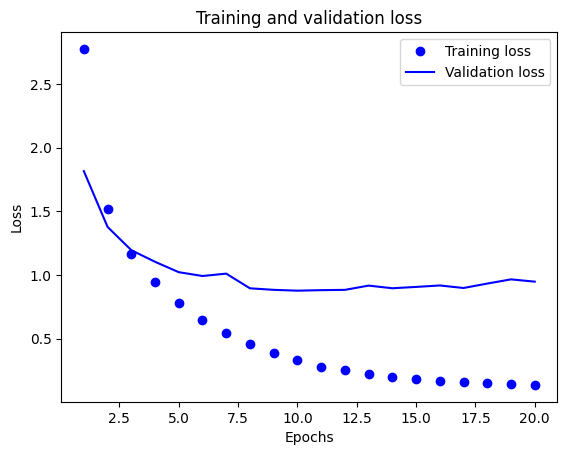

In [ ]:
# Plotting the training and validation loss.
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

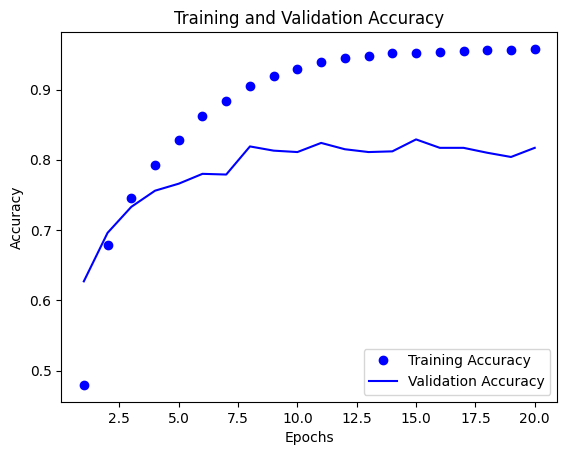

In [ ]:
# Plotting the training and validation accuracy.
import matplotlib.pyplot as plt
accuracy  = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, accuracy,"bo",label = "Training Accuracy")
plt.plot(epochs,val_accuracy,"b",label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Retraining a model from scratch
model = keras.Sequential([
  layers.Dense(64,activation="relu"),
  layers.Dense(64,activation = "relu"),
  layers.Dense(46,activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"]
              )
model.fit(x_train,y_train,epochs= 9, batch_size= 512)
results = model.evaluate(x_test,y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4002 - loss: 3.1788
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6790 - loss: 1.5390
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7503 - loss: 1.1422
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8107 - loss: 0.9102
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8428 - loss: 0.7454
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8626 - loss: 0.6433
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8939 - loss: 0.5120
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9079 - loss: 0.4350
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9216 - loss: 0.3603
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7970 - loss: 0.8800


In [ ]:
results

[0.9016942381858826, 0.7925200462341309]